In [1]:
import polars as pl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
df = pl.read_csv("./dataset.csv")
df.head()

mag,time,felt,cdi,mmi,alert,sig,tsunami,magType,longitude,latitude,depth
f64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,f64
6.2,27417501580,0,4.0,5.731,2,591,0,24,121.349,22.78,29.5
5.79,27406297890,0,3.0,5.731,2,516,0,24,143.227,12.708,80.0
6.55,27353783380,0,4.0,6.689,3,660,0,24,123.863,12.081,13.5
5.75,27302941650,0,3.0,5.416,2,509,0,24,-69.957,-22.126,35.6
6.3,27238037880,0,4.0,6.636,3,611,0,24,145.077,-5.135,15.0


In [3]:
df.null_count()

mag,time,felt,cdi,mmi,alert,sig,tsunami,magType,longitude,latitude,depth
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

statistic,mag,time,felt,cdi,mmi,alert,sig,tsunami,magType,longitude,latitude,depth
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",301852.0,301852.0,301852.0,301852.0,301852.0,301852.0,301852.0,301852.0,301852.0,301852.0,301852.0,301852.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",4.932958,9.6950e11,9.436697,5.282035,4.865467,2.612303,380.001647,0.0044,12.936422,42.504031,4.287665,69.231841
"""std""",0.482875,6.1995e11,570.07511,2.390505,1.661783,1.12029,89.604286,0.066183,7.082791,120.712378,29.532775,115.309927
"""min""",3.38,-2.2086e12,0.0,0.0,0.0,1.0,176.0,0.0,1.0,-179.9997,-84.133,-3.0
"""25%""",4.6,5.9855e11,0.0,3.4,4.03,2.0,326.0,0.0,9.0,-71.259,-17.5198,10.0
"""50%""",4.8,1.1121e12,0.0,5.0,4.94,3.0,354.0,0.0,9.0,99.978,0.77,33.0
"""75%""",5.1,1.4379e12,0.0,7.8,6.012,4.0,400.0,0.0,9.0,142.424,29.682,60.6
"""max""",9.5,1.7596e12,184649.0,9.1,10.0,4.0,2910.0,1.0,30.0,180.0,87.386,700.9


In [5]:
features = ["mag", "depth", "latitude", "longitude", "sig", "cdi", "mmi"]
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.select(features).to_numpy())
df_scaled = df.with_columns([
    pl.Series(name, scaled_values[:, i]) for i, name in enumerate(features)
])

In [6]:
df_scaled.select(features).describe()

statistic,mag,depth,latitude,longitude,sig,cdi,mmi
str,f64,f64,f64,f64,f64,f64,f64
"""count""",301852.0,301852.0,301852.0,301852.0,301852.0,301852.0,301852.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",3.7496e-16,-6.7287e-17,-3.4885e-17,-3.6039e-17,-2.6516e-16,-1.9597e-16,-1.7961e-16
"""std""",1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002
"""min""",-3.216075,-0.626416,-2.993989,-1.843258,-2.276699,-2.209593,-2.927863
"""25%""",-0.689534,-0.513676,-0.738417,-0.942432,-0.602669,-0.787297,-0.502754
"""50%""",-0.275347,-0.314213,-0.119111,0.476124,-0.290184,-0.117981,0.044851
"""75%""",0.345933,-0.074858,0.859871,0.827754,0.223186,1.053321,0.689942
"""max""",9.458046,5.478012,2.813771,1.13904,28.235285,1.59714,3.089778


In [7]:
df = df.with_columns([
    pl.Series(name, scaled_values[:, i]) for i, name in enumerate(features)
])
df

mag,time,felt,cdi,mmi,alert,sig,tsunami,magType,longitude,latitude,depth
f64,i64,i64,f64,f64,i64,f64,i64,i64,f64,f64,f64
2.623961,27417501580,0,-0.536304,0.520847,2,2.354784,0,24,0.653165,0.626164,-0.344566
1.774878,27406297890,0,-0.954626,0.520847,2,1.517769,0,24,0.834406,0.285119,0.093385
3.348788,27353783380,0,-0.536304,1.097337,3,3.124837,0,24,0.673991,0.263888,-0.483323
1.692041,27302941650,0,-0.954626,0.331291,2,1.439647,0,24,-0.931646,-0.894386,-0.291665
2.831055,27238037880,0,-0.536304,1.065443,3,2.577988,0,24,0.849732,-0.319058,-0.470315
…,…,…,…,…,…,…,…,…,…,…,…
-0.896628,1707366392323,0,-0.787297,-0.463639,1,-0.758912,0,9,0.823179,1.130764,-0.215436
-0.896628,1707361863665,0,-0.787297,-0.463639,1,-0.758912,0,9,0.842008,-0.292403,-0.513676
-0.689534,1707358824380,0,-0.787297,-0.463639,1,-0.602669,0,28,-0.164226,1.052986,-0.370999


In [8]:
def optimize_kmeans(data, max_k=10):
    means = []
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(means, inertias, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(means)
    plt.grid()
    plt.show()
    print(inertias, means)

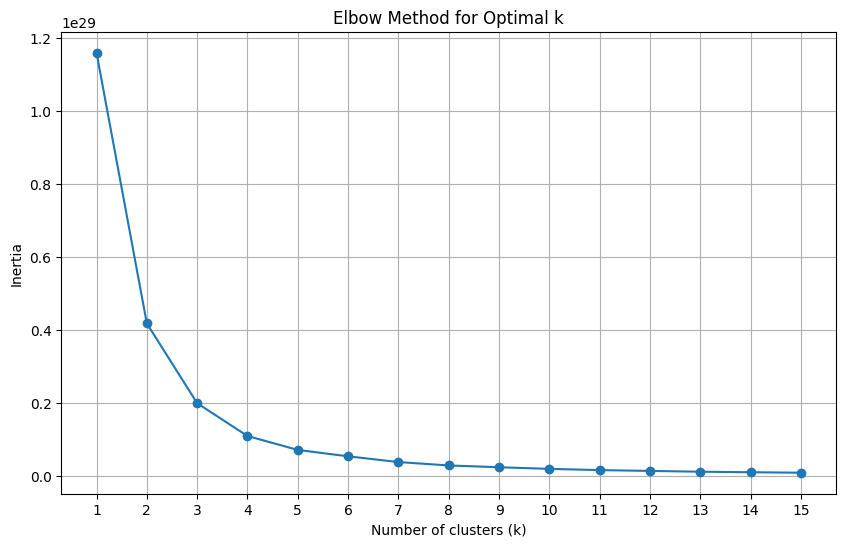

[1.1601187137255816e+29, 4.178766048344436e+28, 1.9919487478200555e+28, 1.092254738810159e+28, 7.10666891352177e+27, 5.352204188132251e+27, 3.779244692541893e+27, 2.8491964997435445e+27, 2.3576145323474077e+27, 1.9154750476654446e+27, 1.5765470222421887e+27, 1.352143168622529e+27, 1.1282810539303804e+27, 9.927339449966871e+26, 8.57071593290196e+26] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [9]:
optimize_kmeans(df, max_k=15)

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [11]:
df = df.with_columns([
    pl.Series("cluster", kmeans.labels_)
])
df.write_csv("clustered_earthquakes.csv")
df

mag,time,felt,cdi,mmi,alert,sig,tsunami,magType,longitude,latitude,depth,cluster
f64,i64,i64,f64,f64,i64,f64,i64,i64,f64,f64,f64,i32
2.623961,27417501580,0,-0.536304,0.520847,2,2.354784,0,24,0.653165,0.626164,-0.344566,0
1.774878,27406297890,0,-0.954626,0.520847,2,1.517769,0,24,0.834406,0.285119,0.093385,0
3.348788,27353783380,0,-0.536304,1.097337,3,3.124837,0,24,0.673991,0.263888,-0.483323,0
1.692041,27302941650,0,-0.954626,0.331291,2,1.439647,0,24,-0.931646,-0.894386,-0.291665,0
2.831055,27238037880,0,-0.536304,1.065443,3,2.577988,0,24,0.849732,-0.319058,-0.470315,0
…,…,…,…,…,…,…,…,…,…,…,…,…
-0.896628,1707366392323,0,-0.787297,-0.463639,1,-0.758912,0,9,0.823179,1.130764,-0.215436,1
-0.896628,1707361863665,0,-0.787297,-0.463639,1,-0.758912,0,9,0.842008,-0.292403,-0.513676,1
-0.689534,1707358824380,0,-0.787297,-0.463639,1,-0.602669,0,28,-0.164226,1.052986,-0.370999,1


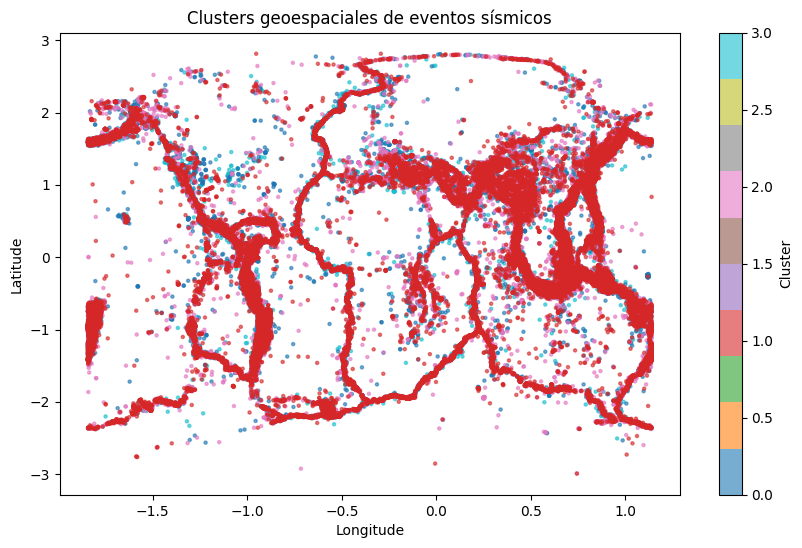

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df["longitude"], df["latitude"], c=df["cluster"], cmap='tab10', s=5, alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters geoespaciales de eventos sísmicos")
plt.colorbar(label="Cluster")
plt.show()

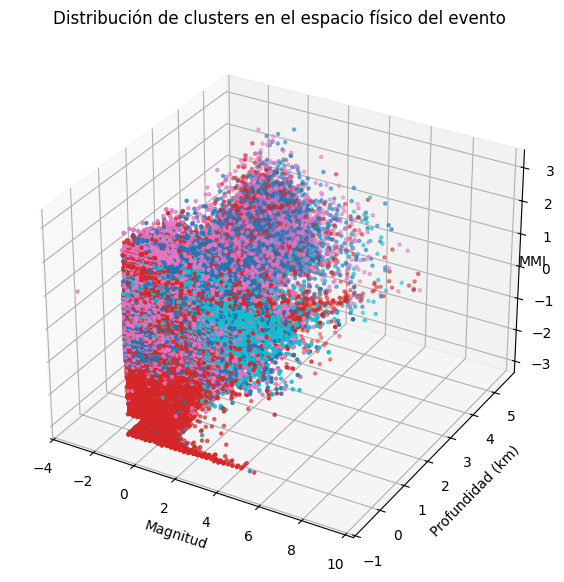

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["mag"], df["depth"], df["mmi"], c=df["cluster"], cmap="tab10", s=5)
ax.set_xlabel("Magnitud")
ax.set_ylabel("Profundidad (km)")
ax.set_zlabel("MMI", labelpad=-15)
plt.title("Distribución de clusters en el espacio físico del evento")
plt.show()

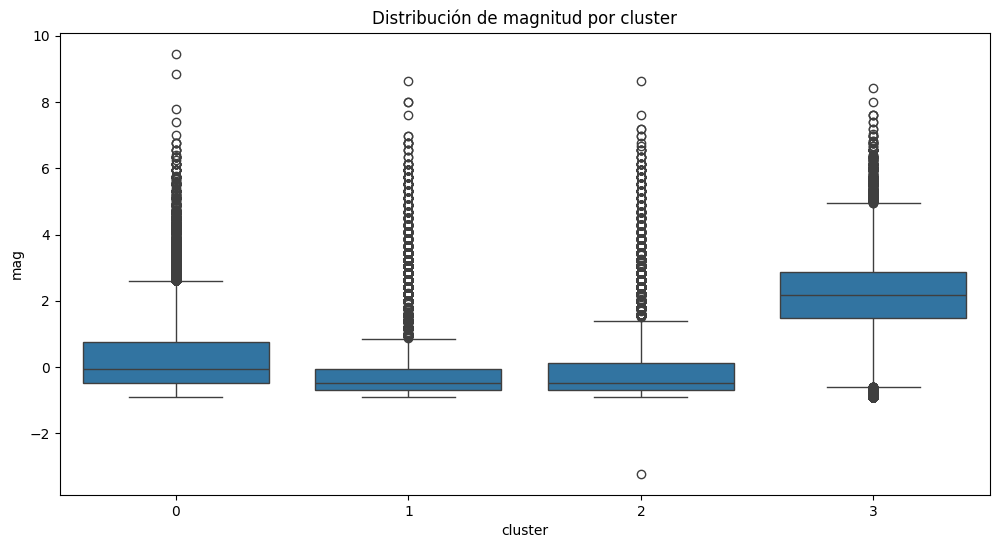

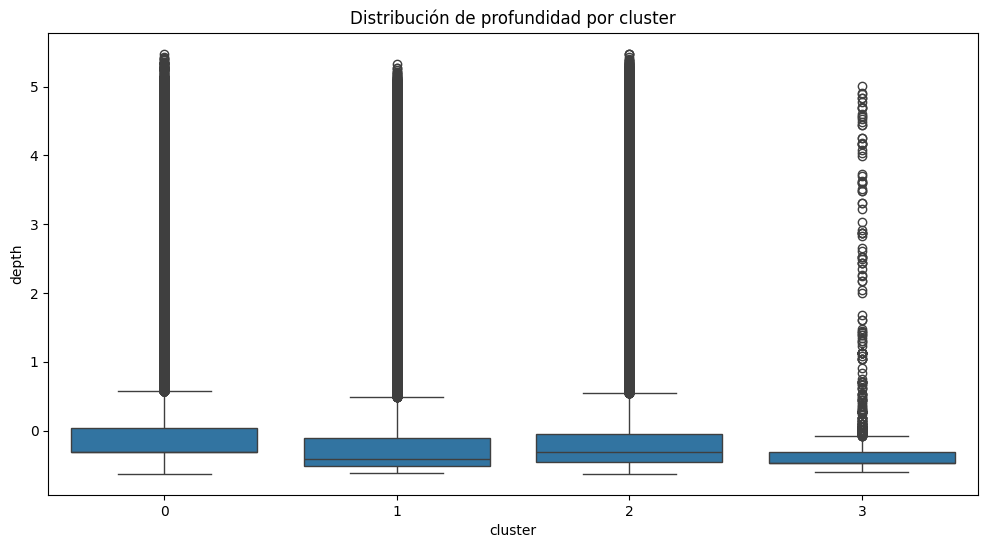

In [14]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="cluster", y="mag", data=df)
plt.title("Distribución de magnitud por cluster")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="cluster", y="depth", data=df)
plt.title("Distribución de profundidad por cluster")
plt.show()


In [15]:
summary = df.group_by("cluster").mean()
summary

cluster,mag,time,felt,cdi,mmi,alert,sig,tsunami,magType,longitude,latitude,depth
i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,-0.243833,1.5030e12,18.170321,-0.719727,-0.46022,1.811441,-0.187718,0.010915,12.404249,-0.024043,-0.131041,-0.06134
0,0.22231,3.6101e11,0.224796,0.776365,0.229597,3.435136,0.16145,0.0,12.048381,-0.029966,0.137123,0.109193
3,2.193769,-1.0252e12,0.048419,1.043962,0.846835,3.655845,1.993271,0.0,23.304599,-0.113766,0.564572,-0.379242
2,-0.111335,9.9176e11,6.566044,0.19223,0.314377,2.872188,-0.112549,0.0,13.150294,0.067657,-0.004133,0.035355


In [16]:
import joblib

model_info = {
    "n_clusters": kmeans.n_clusters,
    "features_to normalize": features,
}

joblib.dump(kmeans, "./kmeans_model.pkl")
joblib.dump(scaler, "./scaler.pkl")
joblib.dump(model_info, "./model_info.pkl")

['./model_info.pkl']